# Naive Bayes - Supervised Machine Learning Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from xgboost import plot_importance
from numpy import loadtxt
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
#from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import recall_score

# Reading the Data from the CSV File

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("final_dataset.csv",index_col=0)
train.head()

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,44,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


# Dimensions of the DataFrame read from the CSV file

In [3]:
l = train.shape
print("Number of Rows: ",l[0])
print("Number of Columns: ",l[1])

Number of Rows:  12794627
Number of Columns:  84


# Unique Elements in Label Section are DDOS and Benign

In [4]:
train.Label.unique()

array(['ddos', 'Benign'], dtype=object)

# Labelling DDOS with 1 and Benign with 0 in the corresponding Label Column

In [5]:
train['Label'] = train.Label.map({'ddos':1, 'Benign':0})
train.Label.unique()

array([1, 0])

# Finding out the count of NAN values in Flow Byts/s Column 

In [6]:
h = train['Flow Byts/s'].isna().sum()
p = train['Flow Byts/s'].dtype
print("Column Flow Byts/s has NAN values in it with count as",h) 

Column Flow Byts/s has NAN values in it with count as 29713


# Removing rows which have NAN values in Flow Byts/s column

In [7]:
train.dropna(subset = ["Flow Byts/s"], inplace=True)
train.shape

(12764914, 84)

# Checking sum  of NAN values in each column of the Train DataFrame

In [8]:
h = train.isna().sum()
l = len(h)
for i in range (0,l):
    print(i,h[i])

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0


# Preprocessing for object and float data type columns

In [9]:
from sklearn import preprocessing
for f in train.columns:
    if train[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
    elif train[f].dtype == 'float64':
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
train=np.array(train) 
train = train.astype(float)
train

array([[4.816557e+06, 1.441500e+04, 4.504000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [4.816557e+06, 1.441500e+04, 4.504000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [4.816558e+06, 1.441500e+04, 4.505000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [1.099806e+06, 8.872000e+03, 6.108700e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.913485e+06, 9.081000e+03, 6.158000e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.028800e+05, 8.909000e+03, 4.939300e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

# Conversion of Numpy array to Data Frame, Creating X and Y data frame by seperating Label Column

In [10]:
d0 = pd.DataFrame(train)
X = d0.drop(83,axis=1)
Y = d0[83]

# Dimension of d0, X and Y 

In [11]:
p = d0.shape
q = X.shape
r = Y.shape
print(p)
print(q)
print(r)

(12764914, 84)
(12764914, 83)
(12764914,)


# Splitting of Train and Test data from the X and Y

In [23]:
seed = 7
test_size = 0.0001
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Dimensions of Train and Test data in X and Y

In [24]:
u = X_train.shape
v = y_train.shape
w = X_test.shape
z = y_test.shape
print(u)
print(v)
print(w)
print(z)

(12763637, 83)
(12763637,)
(1277, 83)
(1277,)


# Time to model the data and predict the y values based on X_test dataset

In [25]:
#%%time
import pickle
model=BernoulliNB(binarize=0.0)
model.fit(X_train, y_train)
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
y_pred = model.predict(X_test)

# Evaluation Metrics of y_test score with y_pred score

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.8621769772905247
f1-acore: 0.8666666666666667
confusion matrix:
 [[529 109]
 [ 67 572]]
Precision: 0.8399412628487518
Recall_score: 0.8951486697965572
Misclassified : 176


# ROC curve for the evaluation metrics found above

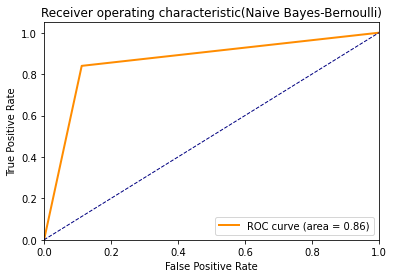

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Naive Bayes-Bernoulli)')
plt.legend(loc="lower right")

In [28]:
A = model.feature_log_prob_[0, :].argsort()
print(A[:10])
B = model.feature_log_prob_[1, :].argsort()
print(B[:10])

[63 62 61 65 66 38 39 64 55 37]
[39 61 38 66 65 54 64 63 62 36]


In [29]:
X_test.to_csv('X_test.csv',index = False)
y_test.to_csv('y_test.csv',index=False)